In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import sqlite3

In [2]:
df_BarcelonaSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB06Sep24.csv')
df_BarcelonaJune24 =pd.read_csv(r'C:\Users\alber\Downloads\listingsB15June24.csv')
df_BarcelonaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB20March24.csv')
df_BarcelonaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB13Dec23.csv')
df_SevillaJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS30June24.csv')
df_SevillaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS31March24.csv')
df_SevillaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS29Dec23.csv')
df_MadridSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM11Sep24.csv')
df_MadridJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15June24.csv')
df_MadridMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM22March24.csv')
df_MadridDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15Dec23.csv')

In [3]:
df_BSept24_copia = df_BarcelonaSept24.copy()
df_BMarch24_copia = df_BarcelonaMarch24.copy()
df_BJune24_copia = df_BarcelonaJune24.copy()
df_BDec23_copia = df_BarcelonaDec23.copy()

df_MDec23_copia = df_MadridDec23.copy()
df_MJune24_copia = df_MadridJune24.copy()
df_MSept24_copia = df_MadridSept24.copy()
df_MMarch24_copia = df_MadridMarch24.copy()

df_SJune24_copia = df_SevillaJune24.copy()
df_SMarch24_copia = df_SevillaMarch24.copy()
df_SDec23_copia = df_BarcelonaDec23.copy()

df_BSept24_copia['month'] = 'September'
df_BMarch24_copia['month'] = 'March'
df_BJune24_copia['month'] = 'June'
df_BDec23_copia['month'] = 'December'  

df_MDec23_copia['month'] = 'December'
df_MJune24_copia['month'] = 'June'
df_MSept24_copia['month'] = 'September'
df_MMarch24_copia['month'] = 'March'

df_SJune24_copia['month'] = 'June'
df_SMarch24_copia['month'] = 'March'
df_SDec23_copia['month'] = 'December'

df_BSept24_copia['state'] = 'Barcelona'
df_BMarch24_copia['state'] = 'Barcelona'
df_BJune24_copia['state'] = 'Barcelona'
df_BDec23_copia['state'] = 'Barcelona'  

df_MDec23_copia['state'] = 'Madrid'
df_MJune24_copia['state'] = 'Madrid'
df_MSept24_copia['state'] = 'Madrid'
df_MMarch24_copia['state'] = 'Madrid'

df_SJune24_copia['state'] = 'Sevilla'
df_SMarch24_copia['state'] = 'Sevilla'
df_SDec23_copia['state'] = 'Sevilla'

df_concatenado_total = pd.concat([df_BSept24_copia, df_BMarch24_copia, df_BJune24_copia, df_BDec23_copia, df_MSept24_copia, df_MMarch24_copia, df_MJune24_copia, df_MDec23_copia, df_SMarch24_copia, df_SJune24_copia, df_SDec23_copia ], ignore_index=True)

df_concatenado_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              214637 non-null  int64  
 1   name                            214637 non-null  object 
 2   host_id                         214637 non-null  int64  
 3   host_name                       214605 non-null  object 
 4   neighbourhood_group             214637 non-null  object 
 5   neighbourhood                   214637 non-null  object 
 6   latitude                        214637 non-null  float64
 7   longitude                       214637 non-null  float64
 8   room_type                       214637 non-null  object 
 9   price                           177265 non-null  float64
 10  minimum_nights                  214637 non-null  int64  
 11  number_of_reviews               214637 non-null  int64  
 12  last_review     

In [4]:

# Concatenar los DataFrames
df_concatenado_Barcelona = pd.concat([df_BSept24_copia, df_BMarch24_copia, df_BJune24_copia, df_BDec23_copia], ignore_index=True)


# Concatenar los DataFrames
df_concatenado_Madrid = pd.concat([df_MSept24_copia, df_MMarch24_copia, df_MJune24_copia, df_MDec23_copia], ignore_index=True)


# Concatenar los DataFrames
df_concatenado_Sevilla = pd.concat([df_SMarch24_copia, df_SJune24_copia, df_SDec23_copia], ignore_index=True)




Valores nulos por columna:
 id                                     0
name                                   0
host_id                                0
host_name                             32
neighbourhood_group                    0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                              37372
minimum_nights                         0
number_of_reviews                      0
last_review                        47237
reviews_per_month                  47237
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           125016
month                                  0
state                                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 19 columns):
 #   Column                 

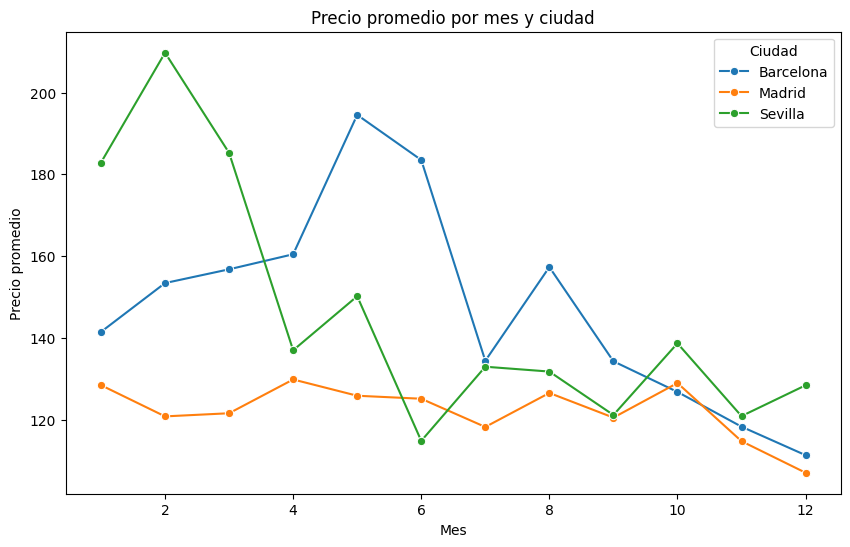

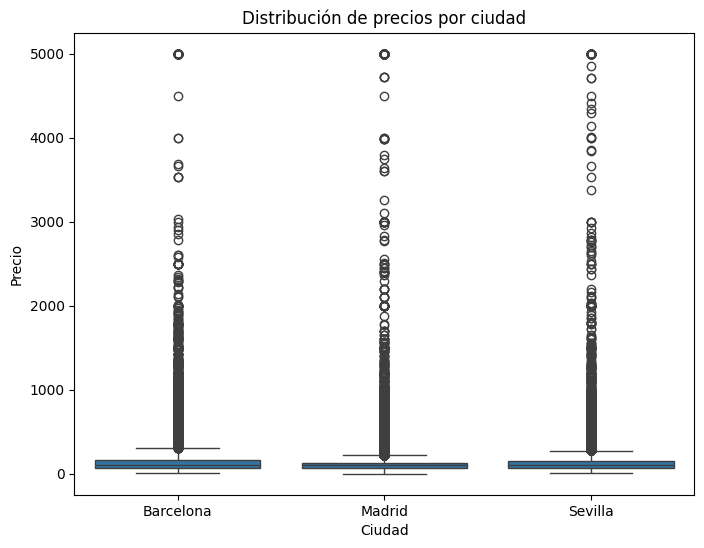

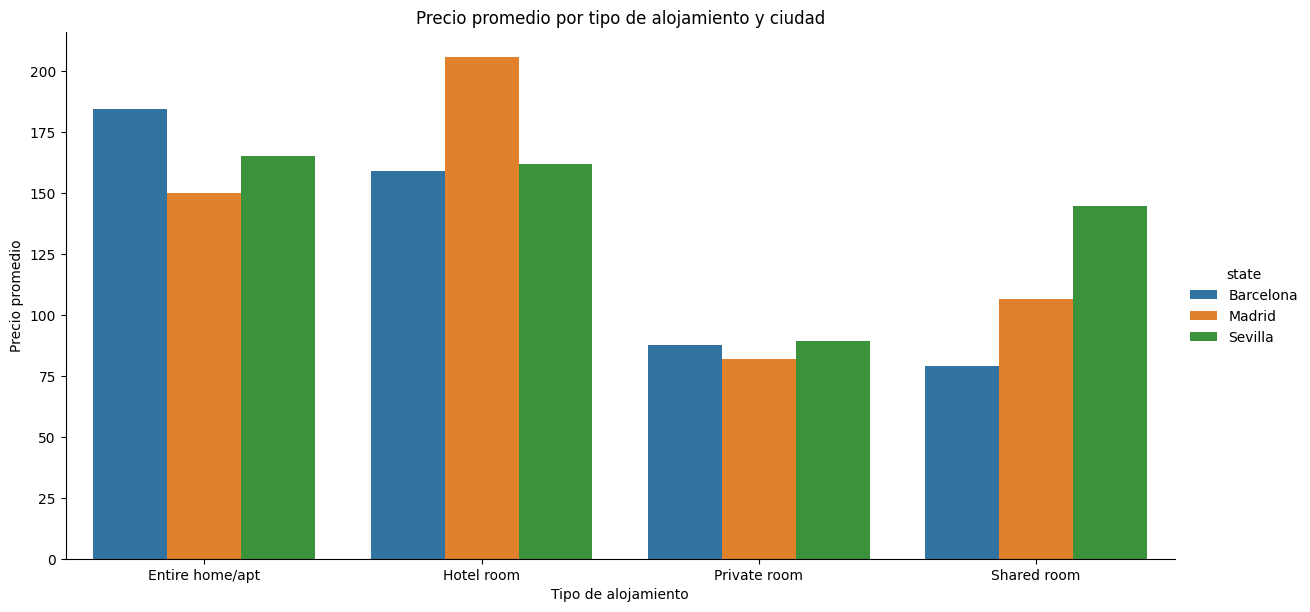

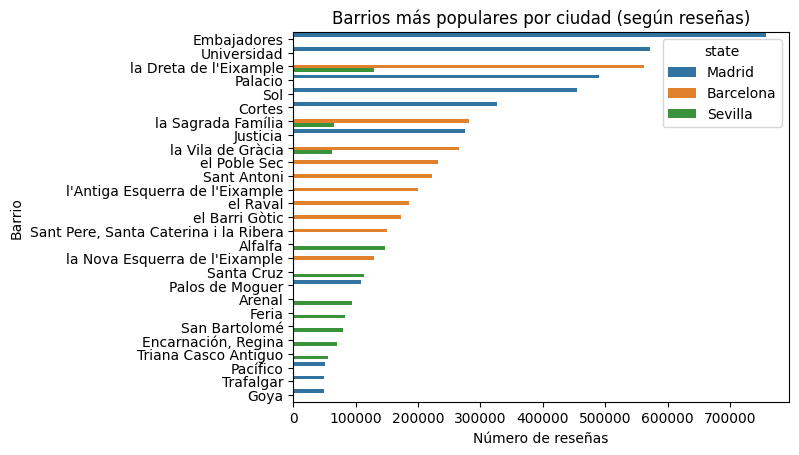

Estructura de cluster_data: (301, 12)
Primeras filas de cluster_data:
 month                   1.0         2.0         3.0         4.0         5.0   \
neighbourhood                                                                  
Abrantes           78.800000   69.700000   50.941176   59.333333   45.062500   
Acacias           102.697674   90.026316  132.340206   52.133333   97.560606   
Adelfas            98.280000   91.200000   93.534884  111.571429   98.029412   
Aeropuerto          0.000000   59.000000   39.600000  100.000000   60.000000   
Aeropuerto Viejo    0.000000  100.000000   65.000000    0.000000  100.000000   

month                   6.0         7.0         8.0        9.0        10.0  \
neighbourhood                                                                
Abrantes           55.375000   60.095238   58.333333  55.200000  49.900000   
Acacias           101.758065  106.805970   95.120482  93.933333  92.966667   
Adelfas           132.111111   90.296296  103.968750  84

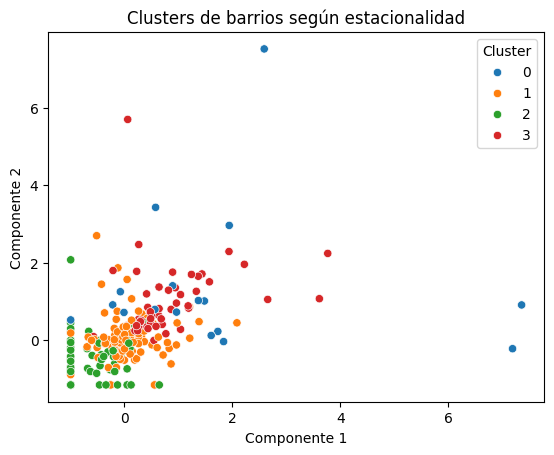

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     548.3
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:53:49   Log-Likelihood:            -1.4461e+06
No. Observations:              214637   AIC:                         2.892e+06
Df Residuals:                  214633   BIC:                         2.892e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              119.3392      0.717  

C:\Users\alber\AppData\Local\Temp\ipykernel_22944\3346737053.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['price'] = city_data['price'].clip(0, 5000)  # Limitar valores
C:\Users\alber\AppData\Local\Temp\ipykernel_22944\3346737053.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')


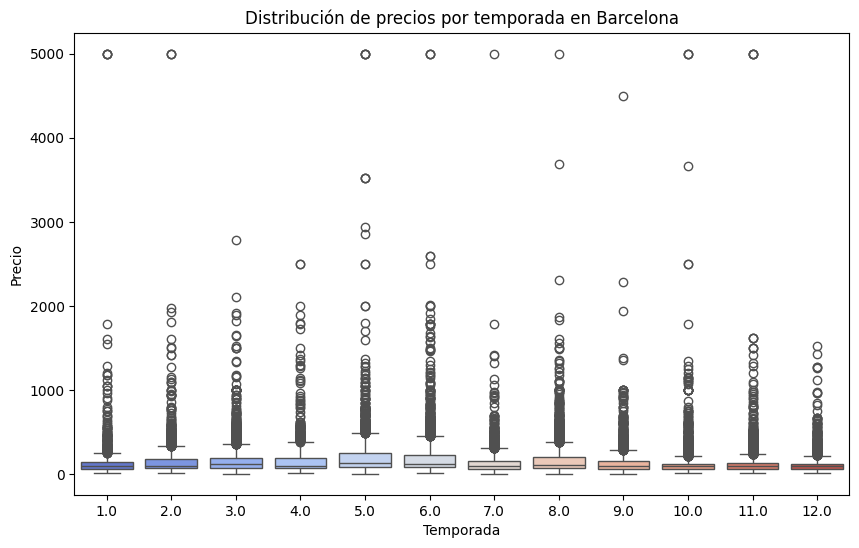

Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en Barcelona.


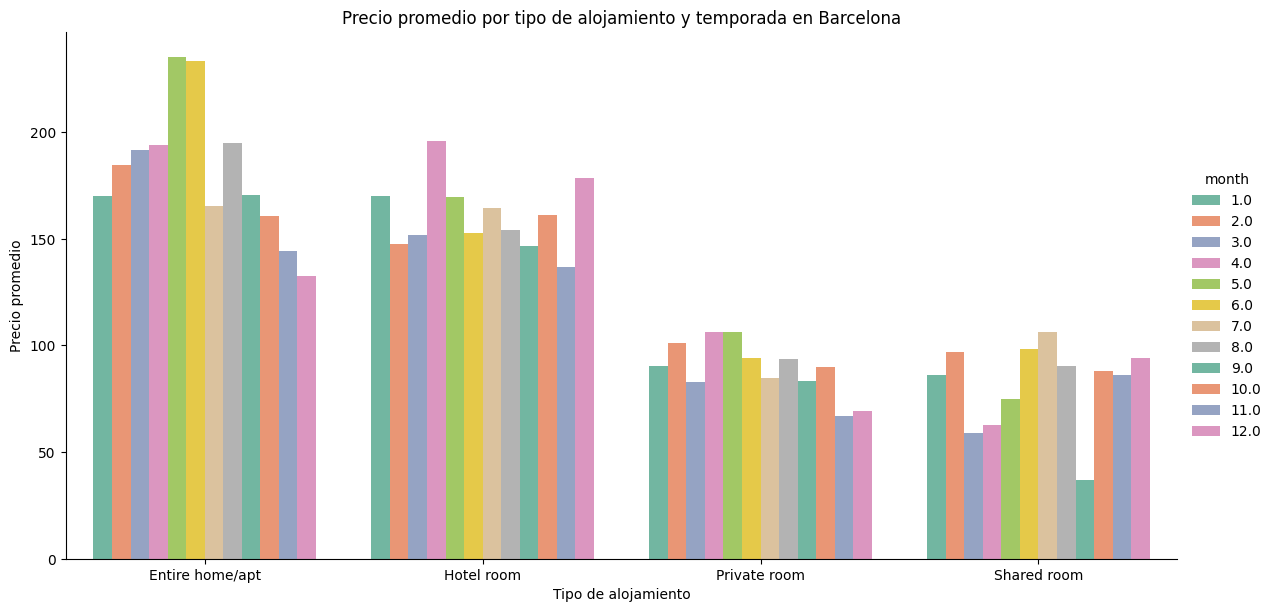



=== Análisis para Madrid ===



C:\Users\alber\AppData\Local\Temp\ipykernel_22944\3346737053.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['price'] = city_data['price'].clip(0, 5000)  # Limitar valores
C:\Users\alber\AppData\Local\Temp\ipykernel_22944\3346737053.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')


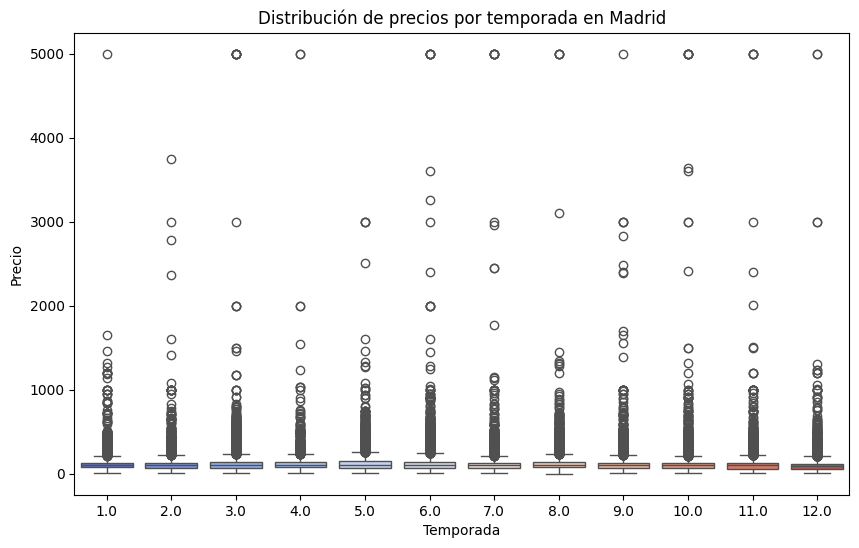

Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en Madrid.


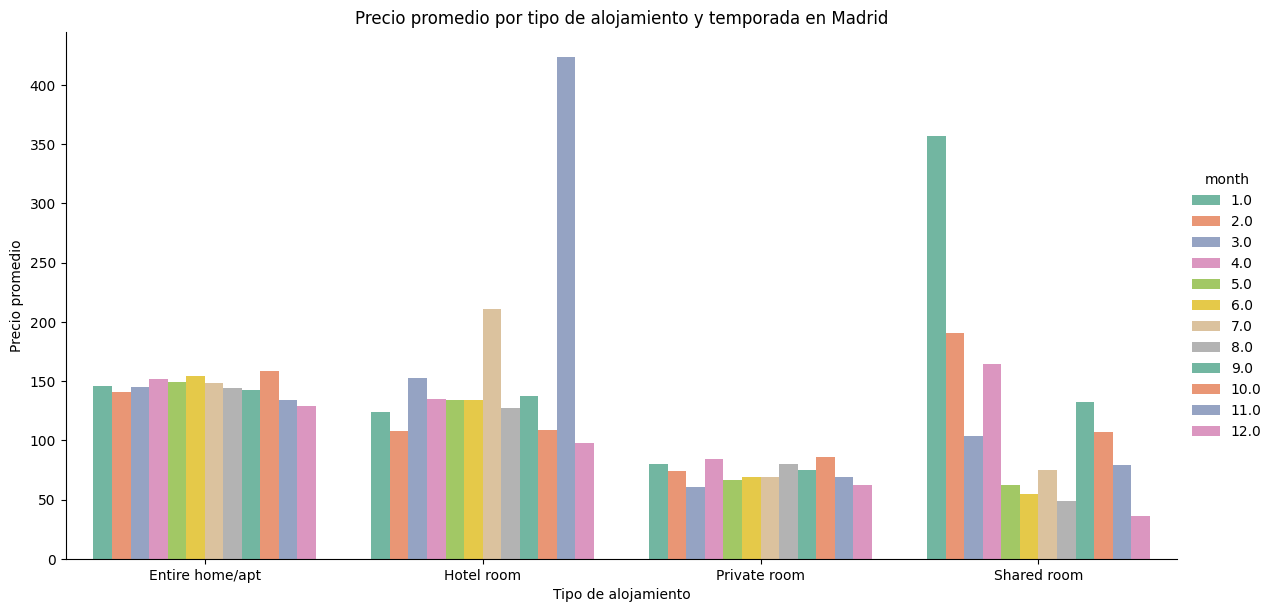



=== Análisis para Sevilla ===



C:\Users\alber\AppData\Local\Temp\ipykernel_22944\3346737053.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['price'] = city_data['price'].clip(0, 5000)  # Limitar valores
C:\Users\alber\AppData\Local\Temp\ipykernel_22944\3346737053.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')


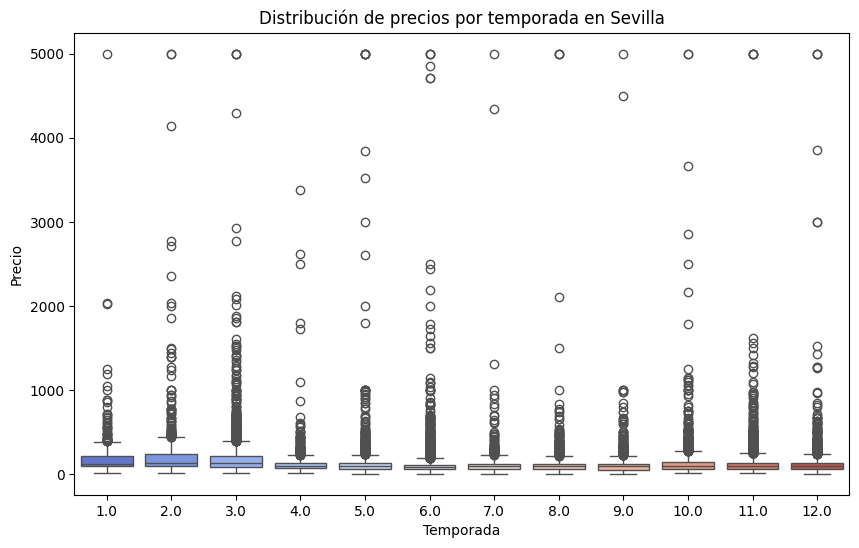

Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en Sevilla.


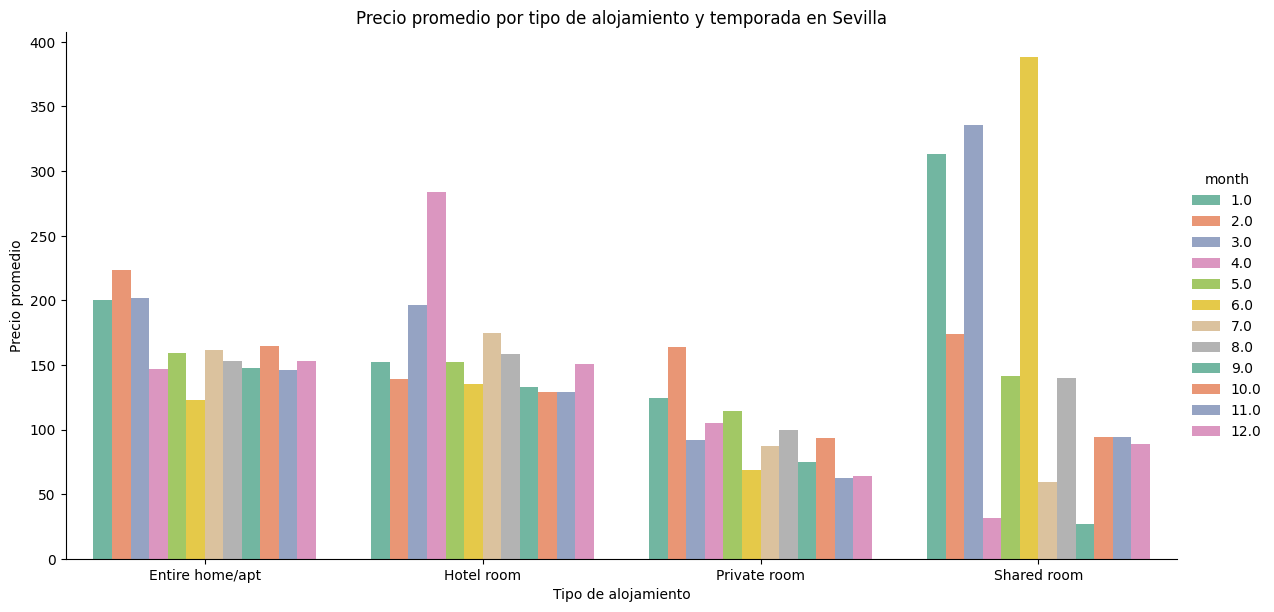

Mapa interactivo de Barcelona guardado como 'barcelona_map.html'.
Mapa interactivo de Madrid guardado como 'madrid_map.html'.
Mapa interactivo de Sevilla guardado como 'sevilla_map.html'.
Datos cargados en la base de datos SQLite.


In [5]:
# =============================
# Cargar datos
# =============================
file_path = r'C:\Users\alber\OneDrive\Documentos\GitHub\DS_ONLINE_THEBRIDGE_ATC\Project_Break_EDA\DataSetConjunto'
data = pd.read_csv(file_path)

# =============================
# Limpieza de datos
# =============================
# Identificar valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Rellenar valores nulos en columnas importantes
data['price'] = data['price'].fillna(data['price'].median())
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Eliminar columnas innecesarias (si aplica)
data = data.drop(columns=['license'], errors='ignore')

# Crear columnas adicionales útiles:
data['month'] = pd.to_datetime(data['last_review'], errors='coerce').dt.month

# Limitar los valores de la columna 'price' entre 0 y 5000
data['price'] = data['price'].clip(0, 5000)

# =============================
# Exploración inicial
# =============================
data.head()  # Verificar las primeras filas
data.info()  # Resumen de columnas y tipos de datos
data.describe()  # Descripción estadística general

# =============================
# Análisis exploratorio
# =============================
# Estacionalidad de precios
price_by_month = data.groupby(['state', 'month'])['price'].mean().reset_index()
price_by_month['price'] = price_by_month['price'].clip(0, 5000)  # Limitar valores

plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_month, x='month', y='price', hue='state', marker='o')
plt.title('Precio promedio por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad')
plt.show()

# Comparación de precios entre ciudades
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='state', y='price')
plt.title('Distribución de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# Tipo de alojamiento
room_type_stats = data.groupby(['state', 'room_type'])['price'].mean().reset_index()
room_type_stats['price'] = room_type_stats['price'].clip(0, 5000)  # Limitar valores

sns.catplot(data=room_type_stats, x='room_type', y='price', hue='state', kind='bar', height=6, aspect=2)
plt.title('Precio promedio por tipo de alojamiento y ciudad')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# Popularidad de barrios
popular_neighbourhoods = data.groupby(['state', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighbourhoods = popular_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).groupby('state').head(10)

sns.barplot(data=popular_neighbourhoods, y='neighbourhood', x='number_of_reviews', hue='state')
plt.title('Barrios más populares por ciudad (según reseñas)')
plt.xlabel('Número de reseñas')
plt.ylabel('Barrio')
plt.show()

# =============================
# Clustering de barrios según comportamiento estacional
# =============================
cluster_data = data.groupby(['neighbourhood', 'month'])['price'].mean().unstack().fillna(0)
cluster_data = cluster_data.clip(0, 5000)  # Limitar valores
print("Estructura de cluster_data:", cluster_data.shape)
print("Primeras filas de cluster_data:\n", cluster_data.head())

if cluster_data.shape[1] > 1:
    # Escalado de los datos
    scaler = StandardScaler()
    cluster_scaled = scaler.fit_transform(cluster_data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=4, random_state=42).fit(cluster_scaled)
    cluster_data['Cluster'] = kmeans.labels_

    # Visualización de clusters
    sns.scatterplot(x=cluster_scaled[:, 0], y=cluster_scaled[:, 1], hue=kmeans.labels_, palette='tab10')
    plt.title("Clusters de barrios según estacionalidad")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.legend(title="Cluster")
    plt.show()
else:
    print("No hay suficientes columnas para realizar el clustering.")

# Regresión múltiple para impacto de ubicación
data['latitude_scaled'] = StandardScaler().fit_transform(data[['latitude']])
data['longitude_scaled'] = StandardScaler().fit_transform(data[['longitude']])
X = data[['latitude_scaled', 'longitude_scaled', 'availability_365']]
y = data['price']  # Ya está limitado entre 0 y 5000
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# =============================
# Funciones de análisis por ciudad
# =============================
def analyze_city(city_name):
    print(f"\n\n=== Análisis para {city_name} ===\n")
    
    # Filtrar datos de la ciudad
    city_data = data[data['state'] == city_name]
    city_data['price'] = city_data['price'].clip(0, 5000)  # Limitar valores

    # Distribución de precios por temporada
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')
    plt.title(f'Distribución de precios por temporada en {city_name}')
    plt.xlabel('Temporada')
    plt.ylabel('Precio')
    plt.show()

    # Filtrar precios para las dos temporadas
    high_season_prices = city_data[city_data['month'] == 'Alta']['price'].dropna()
    low_season_prices = city_data[city_data['month'] == 'Baja']['price'].dropna()

    # Verificar que ambas muestras tengan más de 1 valor para realizar las pruebas
    if len(high_season_prices) > 1 and len(low_season_prices) > 1:
        # Prueba estadística: t-test
        t_stat, p_value = ttest_ind(high_season_prices, low_season_prices, nan_policy='omit')
        print(f"T-test ({city_name}): t-stat = {t_stat:.2f}, p-value = {p_value:.5f}")
        
        # Mann-Whitney U
        u_stat, p_value_u = mannwhitneyu(high_season_prices, low_season_prices, alternative='two-sided')
        print(f"Mann-Whitney U ({city_name}): U-stat = {u_stat:.2f}, p-value = {p_value_u:.5f}")
    else:
        print(f"Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en {city_name}.")

    # Comparación por tipo de alojamiento
    room_season_prices = city_data.groupby(['month', 'room_type'])['price'].mean().reset_index()
    room_season_prices['price'] = room_season_prices['price'].clip(0, 5000)  # Limitar valores
    sns.catplot(data=room_season_prices, x='room_type', y='price', hue='month', kind='bar', height=6, aspect=2, palette='Set2')
    plt.title(f'Precio promedio por tipo de alojamiento y temporada en {city_name}')
    plt.xlabel('Tipo de alojamiento')
    plt.ylabel('Precio promedio')
    plt.show()

# Análisis para las tres ciudades
for city in ['Barcelona', 'Madrid', 'Sevilla']:
    analyze_city(city)

# Visualización geográfica para las ciudades
for city in ['Barcelona', 'Madrid', 'Sevilla']:
    city_data = data[data['state'] == city]
    city_map = folium.Map(location=[city_data['latitude'].mean(), city_data['longitude'].mean()], zoom_start=12)
    for _, row in city_data.iterrows():
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=2,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.5
        ).add_to(city_map)
    city_map.save(f'{city.lower()}_map.html')
    print(f"Mapa interactivo de {city} guardado como '{city.lower()}_map.html'.")

# =============================
# Guardado de datos en SQLite
# =============================
# Conecta a una base de datos SQLite
conn = sqlite3.connect('df_concatenado_total') 

# Carga el DataFrame en una tabla llamada 'data'
data.to_sql('data', conn, if_exists='replace', index=False)
print("Datos cargados en la base de datos SQLite.")

# Función para ejecutar consultas SQL
def run_query(query, connection):
    return pd.read_sql(query, connection)


In [6]:
# Consulta para estacionalidad:
query = '''
SELECT state, month, AVG(price) as avg_price
FROM data
GROUP BY state, month
ORDER BY month;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,month,avg_price
0,Barcelona,NaN,130.425739
1,Madrid,NaN,146.147176
2,Sevilla,NaN,154.459580
3,Barcelona,1.0,141.443909
4,Madrid,1.0,128.402532
5,Sevilla,1.0,182.898630
6,Barcelona,2.0,153.397999
7,Madrid,2.0,120.763170
8,Sevilla,2.0,209.776263
9,Barcelona,3.0,156.763444


In [7]:
# Comparación entre ciudades:
query = '''
SELECT state, AVG(price) as avg_price, COUNT(id) as total_listings
FROM data
GROUP BY state;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,avg_price,total_listings
0,Barcelona,145.432868,75247
1,Madrid,126.663671,105471
2,Sevilla,143.487780,33919


In [8]:
# Tipo de alojamiento:
query = '''
SELECT state, room_type, AVG(price) as avg_price
FROM data
GROUP BY state, room_type;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,room_type,avg_price
0,Barcelona,Entire home/apt,184.491631
1,Barcelona,Hotel room,158.814141
2,Barcelona,Private room,87.514456
3,Barcelona,Shared room,78.946602
4,Madrid,Entire home/apt,149.786312
5,Madrid,Hotel room,205.613861
6,Madrid,Private room,82.009281
7,Madrid,Shared room,106.311184
8,Sevilla,Entire home/apt,165.265261
9,Sevilla,Hotel room,161.729282


In [9]:
# Popularidad de barrios:
query = '''
SELECT state, neighbourhood, SUM(number_of_reviews) as total_reviews
FROM data
GROUP BY state, neighbourhood
ORDER BY total_reviews DESC
LIMIT 15;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,neighbourhood,total_reviews
0,Madrid,Embajadores,756509
1,Madrid,Universidad,571160
2,Barcelona,la Dreta de l'Eixample,562586
3,Madrid,Palacio,490336
4,Madrid,Sol,454452
5,Madrid,Cortes,326041
6,Barcelona,la Sagrada Família,282353
7,Madrid,Justicia,274716
8,Barcelona,la Vila de Gràcia,265675
9,Barcelona,el Poble Sec,231172


In [10]:
# Hosts más activos:
query = '''
SELECT host_id, COUNT(id) as total_listings, AVG(price) as avg_price
FROM data
GROUP BY host_id
ORDER BY total_listings DESC
LIMIT 15;
'''
df_resultado = run_query(query, conn)
df_resultado

,host_id,total_listings,avg_price
0,346367515,2938,152.555820
1,357946540,1623,51.965496
2,377605855,1192,204.449664
3,291253690,1154,173.522530
4,32037490,1086,207.194291
5,1447144,957,422.258098
6,4459553,929,246.036598
7,518713670,893,69.647256
8,434208714,777,130.301158
9,438136382,763,132.186107


In [11]:
# Temporadas:
query = '''
SELECT state, CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END as season, AVG(price) as avg_price
FROM data
GROUP BY state, season;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,season,avg_price
0,Barcelona,Alta,153.377645
1,Barcelona,Baja,142.024536
2,Madrid,Alta,119.594078
3,Madrid,Baja,130.077993
4,Sevilla,Alta,122.414470
5,Sevilla,Baja,152.033067


In [12]:
# Lista de ciudades a analizar
cities = ['Barcelona', 'Madrid', 'Sevilla']

# Consultas para todas las ciudades
for city in cities:
    print(f"\nEjecutando análisis para {city}...")

    # Consulta 1: Precio promedio por temporada
    query_1 = f'''
    SELECT season, AVG(price) AS avg_price
    FROM (
        SELECT *, 
               CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
        FROM data
        WHERE state = '{city}'  -- Ciudad dinámica
    ) AS temp
    GROUP BY season;
    '''
    df_resultado_1 = run_query(query_1, conn)
    print(f"\nPromedio de precios por temporada para {city}:\n", df_resultado_1)

    # Consulta 2: Precio promedio por temporada y tipo de alojamiento
    query_2 = f'''
    SELECT season, room_type, AVG(price) AS avg_price
    FROM (
        SELECT *, 
               CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
        FROM data
        WHERE state = '{city}'  -- Ciudad dinámica
    ) AS temp
    GROUP BY season, room_type;
    '''
    df_resultado_2 = run_query(query_2, conn)
    print(f"\nPromedio de precios por temporada y tipo de alojamiento para {city}:\n", df_resultado_2)

    # Consulta 3: Precio promedio por mes y temporada
    query_3 = f'''
    SELECT month, season, AVG(price) AS avg_price
    FROM (
        SELECT *, 
               CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
        FROM data
        WHERE state = '{city}'  -- Ciudad dinámica
    ) AS temp
    GROUP BY month, season
    ORDER BY month;
    '''
    df_resultado_3 = run_query(query_3, conn)
    print(f"\nPromedio de precios por mes y temporada para {city}:\n", df_resultado_3)




Ejecutando análisis para Barcelona...

Promedio de precios por temporada para Barcelona:
   season   avg_price
0   Alta  153.377645
1   Baja  142.024536

Promedio de precios por temporada y tipo de alojamiento para Barcelona:
   season        room_type   avg_price
0   Alta  Entire home/apt  190.540834
1   Alta       Hotel room  160.369231
2   Alta     Private room   88.441973
3   Alta      Shared room   95.965986
4   Baja  Entire home/apt  181.649904
5   Baja       Hotel room  158.260274
6   Baja     Private room   87.166535
7   Baja      Shared room   73.634820

Promedio de precios por mes y temporada para Barcelona:
     month season   avg_price
0     NaN   Baja  130.425739
1     1.0   Baja  141.443909
2     2.0   Baja  153.397999
3     3.0   Baja  156.763444
4     4.0   Baja  160.445387
5     5.0   Baja  194.563597
6     6.0   Alta  183.521965
7     7.0   Alta  134.375146
8     8.0   Alta  157.314619
9     9.0   Baja  134.252252
10   10.0   Baja  126.753012
11   11.0   Baja  118.24

=== Análisis de Barcelona ===

Valores nulos por columna:
id                                    0
name                                  0
host_id                               0
host_name                             8
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             13924
minimum_nights                        0
number_of_reviews                     0
last_review                       18664
reviews_per_month                 18664
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24267
month                                 0
state                                 0
dtype: int64




C:\Users\alber\AppData\Local\Temp\ipykernel_22944\2946483294.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')


Total de registros después de filtrar precios <= 1000: 61323



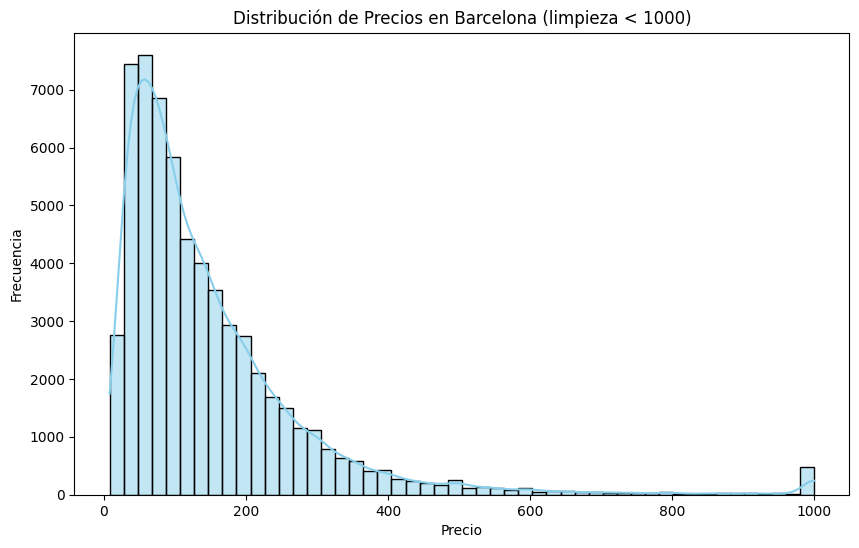

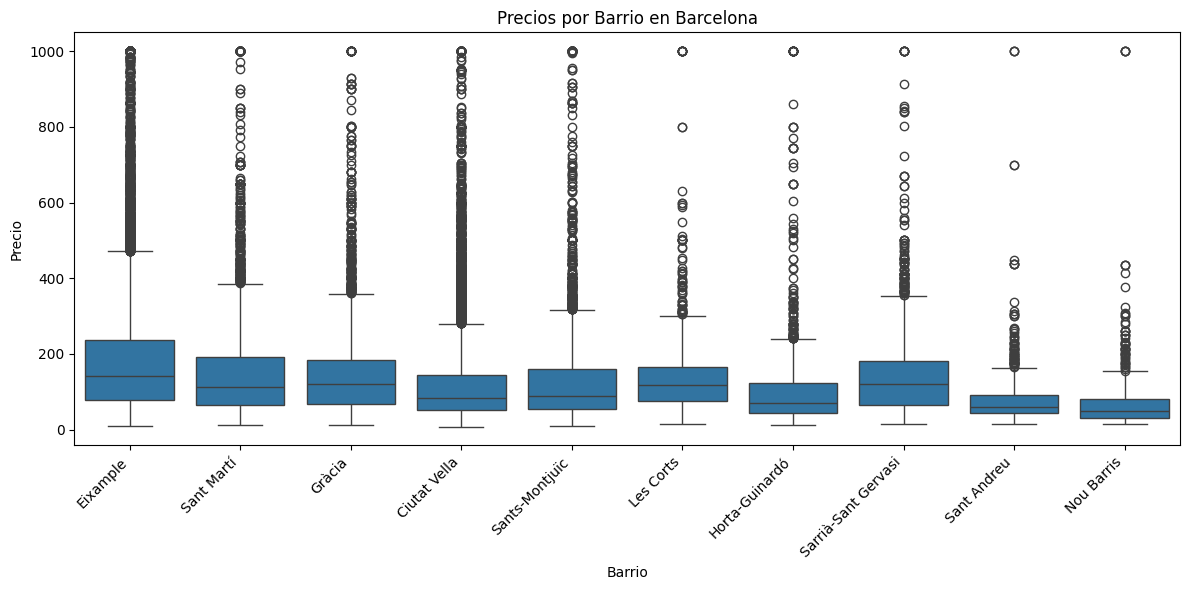

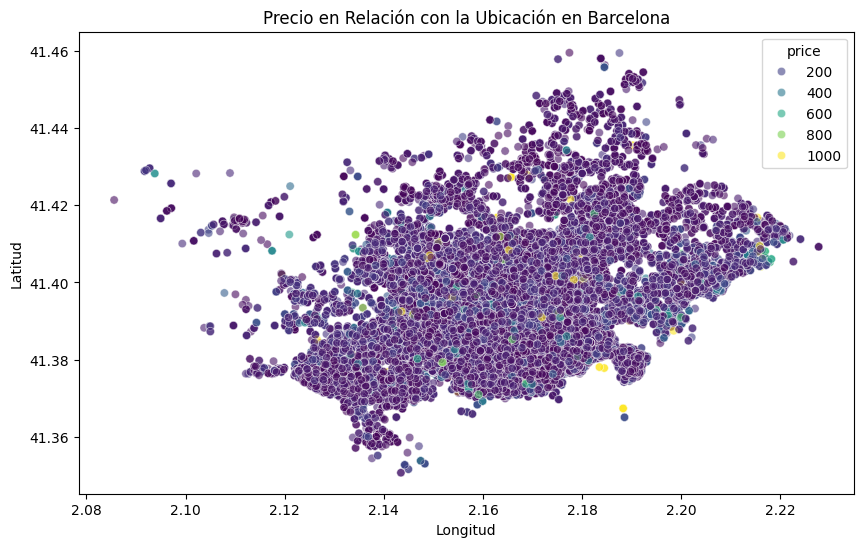

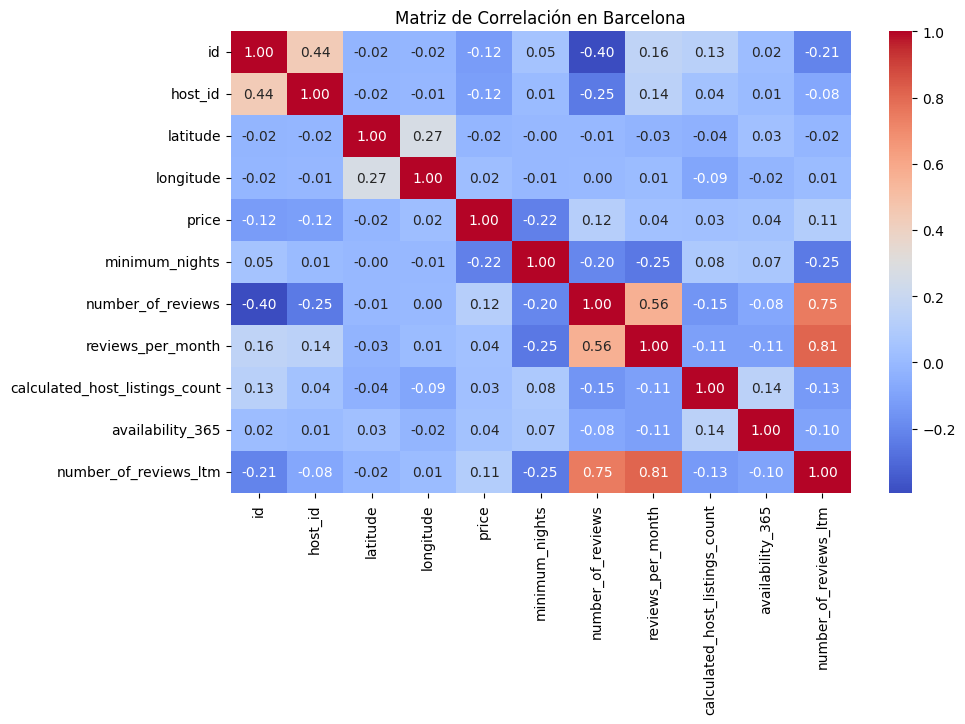

Top 10 propiedades más caras en Barcelona
                                                   name neighbourhood_group  \
1286  Villa Victoria Barcelona - Luxury Villa with P...      Horta-Guinardó   
1650                      Triplex Pelayo Deluxe - BCN54        Ciutat Vella   
1660  sf 6 Group Apartments by Sagrada Familia of Gaudi            Eixample   
1700                         3 beach olimpic apartments          Sant Martí   
1701                            Diagonal Mar apartments          Sant Martí   
1702                             FRONT BEACH Apartments          Sant Martí   
1704                               4 SEASIDE Apartments          Sant Martí   
1705                       3 apartments in Diagonal Mar          Sant Martí   
1706                       4 apartments in Olympic zone          Sant Martí   
1761  The Fortysix Luxury Apartment, Passeig de Gracia.            Eixample   

       price        room_type  
1286  1000.0  Entire home/apt  
1650  1000.0  Entire hom

C:\Users\alber\AppData\Local\Temp\ipykernel_22944\2946483294.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')


Total de registros después de filtrar precios <= 1000: 85110



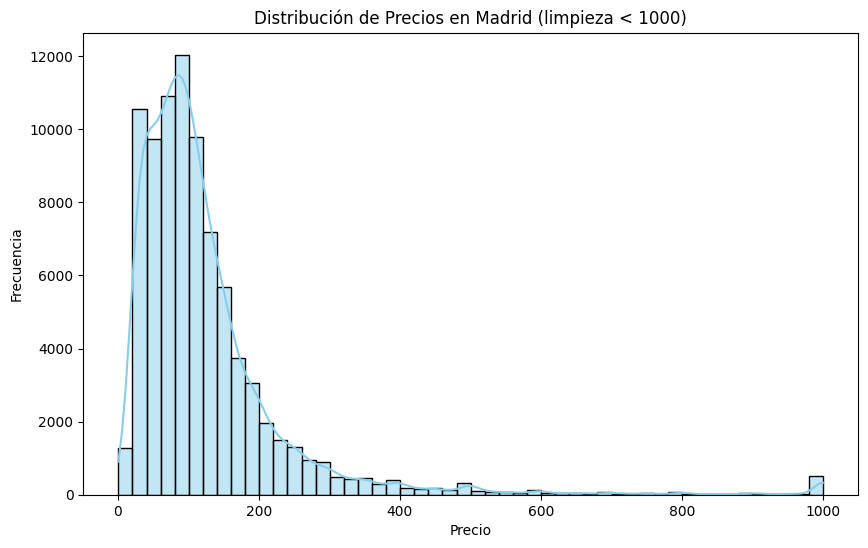

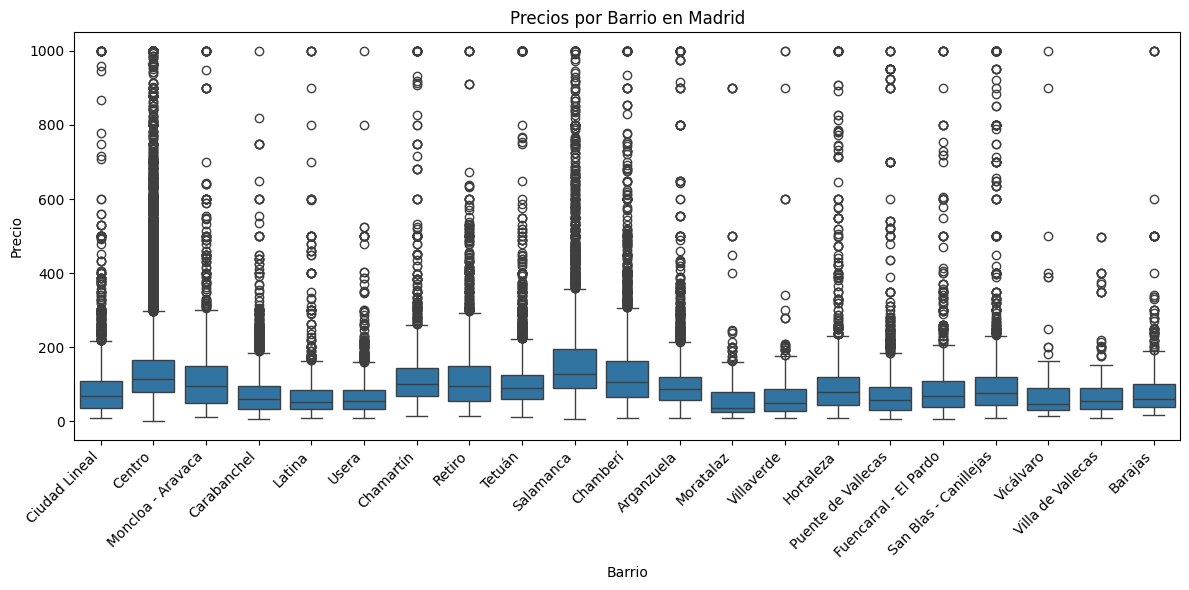

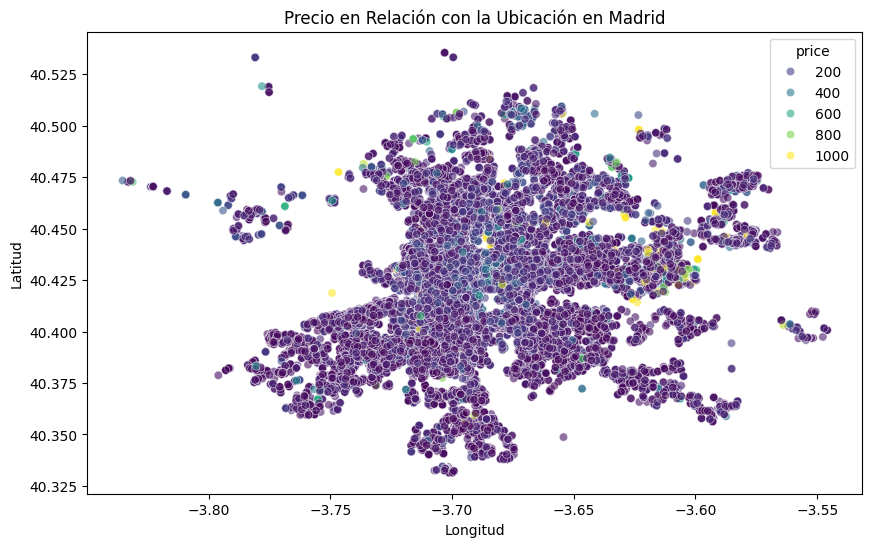

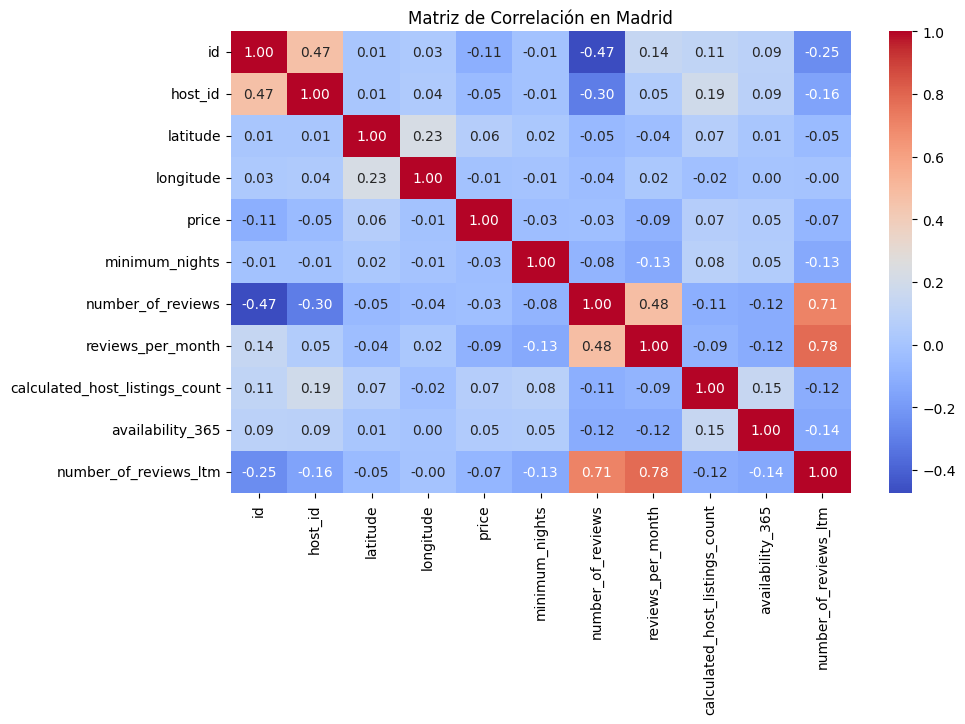

Top 10 propiedades más caras en Madrid
                                                   name neighbourhood_group  \
557                           Precioso piso con terraza            Chamberí   
630   Room and living with bath and kitchen in Malasaña              Centro   
642                         Habitación privada con baño              Latina   
915                          Apartamento 2 habitaciones              Tetuán   
1099  Luxury apartment in Madrid, near the Royal Pal...   Moncloa - Aravaca   
1165     Stunning duplex | Terrace & BBQ | Free Parking              Tetuán   
2555                     Villa de lujo centro de Madrid           Chamartín   
2588  Serenity room with private bathroom in the Center              Centro   
2993                                Mi Casa es tu Casa!            Chamberí   
3363                   Soho Boutique Opera, Triple Room              Centro   

       price        room_type  
557   1000.0  Entire home/apt  
630   1000.0     Private ro

C:\Users\alber\AppData\Local\Temp\ipykernel_22944\2946483294.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')


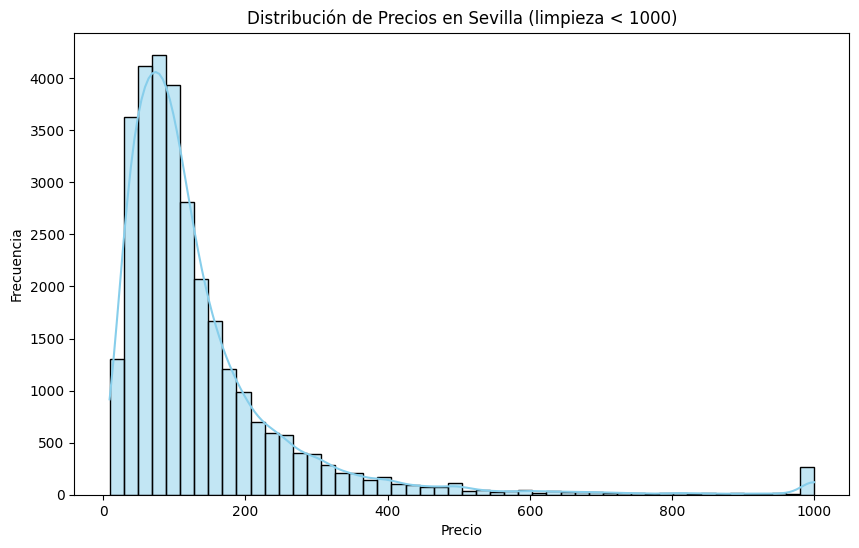

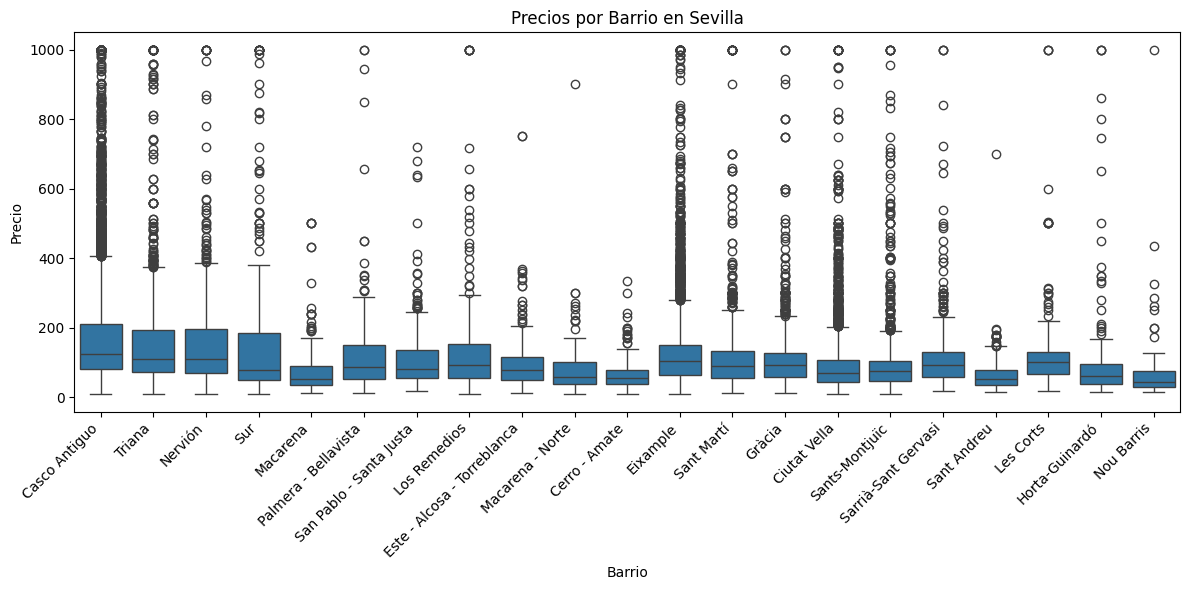

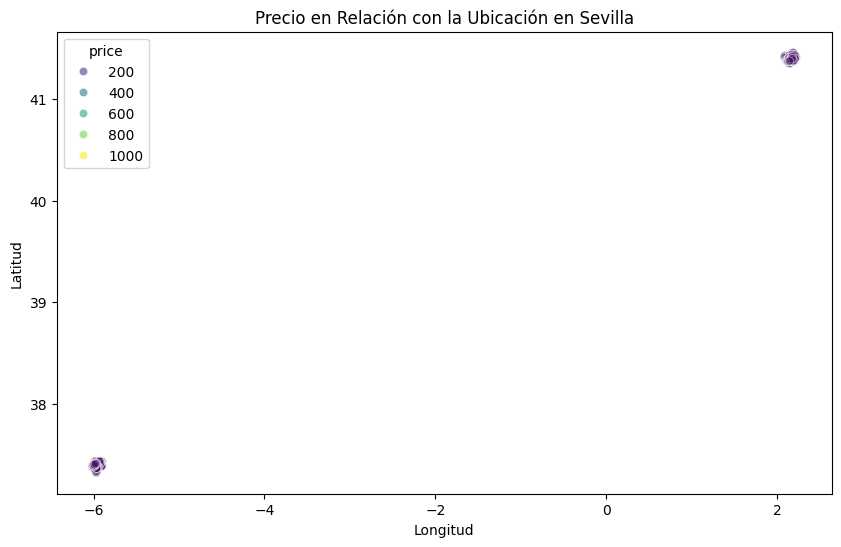

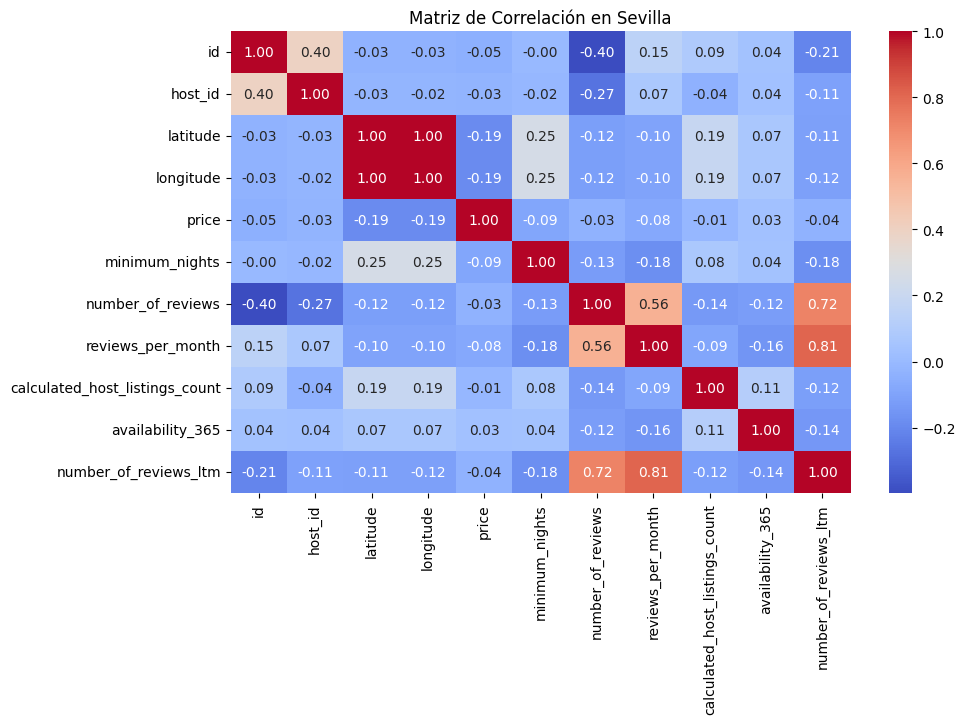

Top 10 propiedades más caras en Sevilla
                                                  name neighbourhood_group  \
198     APARTAMENTO CON TERRAZA PRIVADA   VFT/SE/00595              Triana   
276  APARTAM 1 DORMITORIO CENTRICO WIFI    VFT/SE/0...       Casco Antiguo   
378                     Habitación en casa con encanto       Casco Antiguo   
599  Loft + Private Terrace in the Centre(VFT/SE/00...       Casco Antiguo   
611      PENTHOUSE WITH FANTASTIC PRIVATE TERRACE ****       Casco Antiguo   
617              In the center of Sevilla "La Campana"       Casco Antiguo   
809      Amazing flat in Sevilla´s Heart. Free Parking       Casco Antiguo   
945          FAB HOUSE HISTORIC CENTER GARDEN AND POOL       Casco Antiguo   
948  Luminoso y soleado piso, cinco balcones y terr...       Casco Antiguo   
971  Simply, The Best House in Seville! Swim Pool, 5BR       Casco Antiguo   

      price        room_type  
198  1000.0  Entire home/apt  
276  1000.0  Entire home/apt  
378  100

In [13]:
# =============================
# Función para realizar el análisis
# =============================
def analizar_ciudad(df_ciudad, nombre_ciudad, limite_precio=1000):
    print(f"=== Análisis de {nombre_ciudad} ===\n")
    
    # 1. Verificar valores nulos
    print("Valores nulos por columna:")
    print(df_ciudad.isnull().sum())
    print("\n")

    # 2. Limpiar la columna 'price'
    # Convertir 'price' a string y eliminar símbolos como "$" y ","
    df_ciudad['price'] = df_ciudad['price'].astype(str).replace({'\\$': '', ',': ''}, regex=True)
    
    # Identificar y filtrar solo valores numéricos válidos
    df_ciudad = df_ciudad[df_ciudad['price'].str.replace('.', '', regex=False).str.isdigit()]
    df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')

    # Eliminar filas donde 'price' sea nulo después de la conversión
    df_ciudad = df_ciudad.dropna(subset=['price'])

    # 3. Limitar precios al rango especificado (entre 0 y limite_precio)
    df_ciudad['price'] = df_ciudad['price'].clip(0, limite_precio)

    # 4. Filtrar precios válidos dentro del límite especificado
    df_filtrado = df_ciudad[df_ciudad['price'] <= limite_precio]
    print(f"Total de registros después de filtrar precios <= {limite_precio}: {len(df_filtrado)}\n")

    # 5. Gráfico de distribución de precios
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtrado['price'], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribución de Precios en {nombre_ciudad} (limpieza < {limite_precio})')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()

    # 6. Boxplot de precios por barrio con etiquetas ajustadas
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='neighbourhood_group', y='price', data=df_filtrado)
    plt.title(f'Precios por Barrio en {nombre_ciudad}')
    plt.xlabel('Barrio')
    plt.ylabel('Precio')
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar etiquetas y ajustar alineación
    plt.tight_layout()  # Ajustar automáticamente el espacio del gráfico
    plt.show()

    # 7. Gráfico de dispersión: Precio vs Ubicación
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='longitude', y='latitude', hue='price', data=df_filtrado, palette='viridis', alpha=0.6)
    plt.title(f'Precio en Relación con la Ubicación en {nombre_ciudad}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

    # 8. Matriz de correlación (solo para columnas numéricas)
    columnas_numericas = df_filtrado.select_dtypes(include=['number']).columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_filtrado[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación en {nombre_ciudad}')
    plt.show()

    # 9. Top 10 propiedades más caras
    top_expensive = df_filtrado.nlargest(10, 'price')
    print(f"Top 10 propiedades más caras en {nombre_ciudad}")
    print(top_expensive[['name', 'neighbourhood_group', 'price', 'room_type']])
    
    print("\n--- Fin del Análisis ---\n")


# === Análisis para las 3 ciudades ===
analizar_ciudad(df_concatenado_Barcelona, "Barcelona", limite_precio=1000)
analizar_ciudad(df_concatenado_Madrid, "Madrid", limite_precio=1000)
analizar_ciudad(df_concatenado_Sevilla, "Sevilla", limite_precio=1000)
